In [1]:
import torch

from torch.distributions import multinomial
from d2l import torch as d2l


In [2]:
fair_probs = torch.ones([6])/6

In [3]:
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [4]:
multinomial.Multinomial(1, fair_probs).sample() # simplates a die

tensor([0., 0., 0., 0., 1., 0.])

In [5]:
multinomial.Multinomial(1000, fair_probs).sample()

tensor([164., 176., 148., 181., 165., 166.])

In [6]:
multinomial.Multinomial(100000, fair_probs).sample()/100000

tensor([0.1655, 0.1659, 0.1661, 0.1679, 0.1664, 0.1682])

In [7]:
# We can also visualize how these probabilities converge over time towards the true probability. Let
# us conduct 500 groups of experiments where each group draws 10 samples

counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts)
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts/ cum_counts.sum(dim=1, keepdims=True)
print(estimates)

tensor([[2., 0., 0., 1., 5., 2.],
        [3., 1., 2., 2., 1., 1.],
        [2., 2., 1., 2., 3., 0.],
        ...,
        [3., 1., 2., 1., 1., 2.],
        [1., 3., 2., 0., 1., 3.],
        [2., 1., 3., 1., 2., 1.]])
tensor([[  2.,   0.,   0.,   1.,   5.,   2.],
        [  5.,   1.,   2.,   3.,   6.,   3.],
        [  7.,   3.,   3.,   5.,   9.,   3.],
        ...,
        [849., 846., 812., 818., 803., 852.],
        [850., 849., 814., 818., 804., 855.],
        [852., 850., 817., 819., 806., 856.]])
tensor([[0.2000, 0.0000, 0.0000, 0.1000, 0.5000, 0.2000],
        [0.2500, 0.0500, 0.1000, 0.1500, 0.3000, 0.1500],
        [0.2333, 0.1000, 0.1000, 0.1667, 0.3000, 0.1000],
        ...,
        [0.1705, 0.1699, 0.1631, 0.1643, 0.1612, 0.1711],
        [0.1703, 0.1701, 0.1631, 0.1639, 0.1611, 0.1713],
        [0.1704, 0.1700, 0.1634, 0.1638, 0.1612, 0.1712]])


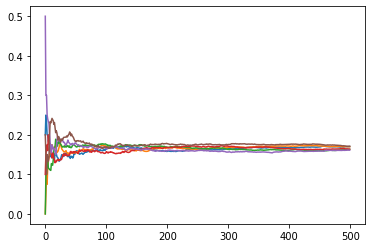

In [8]:
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(), label=("P(die=" + str(i + 1) + ")"))

Each solid curve corresponds to one of the six values of the die and gives our estimated probability
that the die turns up that value as assessed after each group of experiments. The dashed black line
gives the true underlying probability. As we get more data by conducting more experiments, the
6 solid curves converge towards the true probability.

In [9]:
m = [10, 100,10000, 1000000]
n = [5, 500, 5000, 10000]

def make_graph(i=10, j=5, die=0):
    counts = multinomial.Multinomial(i, fair_probs).sample((j,))
        
    cum_counts = counts.cumsum(dim=0)
        
    estimates = cum_counts/ cum_counts.sum(dim=1, keepdims=True)
        
    # lets see the estimate of number of 1s
    d2l.plt.plot(estimates[:,die].numpy(), label=("P(die=" + str(i + 1) + ")"))
        

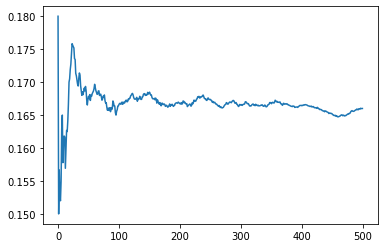

In [10]:
make_graph(100,500, 3)

In [14]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

In [13]:
help(torch.ones(1))

Help on Tensor in module torch object:

class Tensor(torch._C._TensorBase)
 |  Method resolution order:
 |      Tensor
 |      torch._C._TensorBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__ = abs(...)
 |  
 |  __array__(self, dtype=None)
 |  
 |  __array_wrap__(self, array)
 |      # Wrap Numpy array again in a suitable tensor when done, to support e.g.
 |      # `numpy.sin(tensor) -> tensor` or `numpy.greater(tensor, 0) -> ByteTensor`
 |  
 |  __contains__(self, element)
 |      Check if `element` is present in tensor
 |      
 |      Args:
 |          element (Tensor or scalar): element to be checked
 |              for presence in current tensor"
 |  
 |  __deepcopy__(self, memo)
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __floordiv__(self, other)
 |  
 |  __format__(self, format_spec)
 |      Default object formatter.
 |  
 |  __hash__(self)
 |      Return hash(self).
 |  
 |  __ipow__(self, other)
 |  
 |  __iter__(self)
 | 